<h1>AirBnB Project</h1>

<b>Learning Outcomes:</b>

- Learn how to translate business requirements into workable applications
- Declare variables, and manipulate the variables to perform arithmetic operations
- Create a list, append new elements to a list, remove elements from list, and access elements within a list
- Create a dictionary, access data, and update information within the dictionary
- Be able to aptly make use of if and nested if constructs
- Variable conversion
- Produce visualisations
- Able to come up with insights based on the data 

In [1]:
# Read file into a list called airbnb_data
import csv

with open ('airbnb_data.csv') as file:
    airbnb_data=[]
    
    for rows in csv.DictReader(file):
        airbnb_data.append(dict(rows))
        
airbnb_data[:1]

[{'listing_id': '1133718',
  'survey_id': '1280',
  'host_id': '6219420',
  'room_type': 'Shared room',
  'country': '',
  'city': 'Singapore',
  'borough': '',
  'neighborhood': 'MK03',
  'reviews': '9',
  'overall_satisfaction': '4.5',
  'accommodates': '12',
  'bedrooms': '1.0',
  'bathrooms': '',
  'price': '74.0',
  'minstay': '',
  'last_modified': '2017-05-17 09:10:25.431659',
  'latitude': '1.293354',
  'longitude': '103.769226',
  'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}]

In [2]:
# data cleaning of some of the data types

for rows in airbnb_data:
    rows['reviews']=float(rows['reviews'])
    rows['overall_satisfaction']=float(rows['overall_satisfaction'])
    rows['price']=float(rows['price'])
    rows['latitude']=float(rows['latitude'])
    rows['longitude']=float(rows['longitude'])
    
airbnb_data[:1]


[{'listing_id': '1133718',
  'survey_id': '1280',
  'host_id': '6219420',
  'room_type': 'Shared room',
  'country': '',
  'city': 'Singapore',
  'borough': '',
  'neighborhood': 'MK03',
  'reviews': 9.0,
  'overall_satisfaction': 4.5,
  'accommodates': '12',
  'bedrooms': '1.0',
  'bathrooms': '',
  'price': 74.0,
  'minstay': '',
  'last_modified': '2017-05-17 09:10:25.431659',
  'latitude': 1.293354,
  'longitude': 103.769226,
  'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}]

## Exploratory Data Analysis
* List out each neighborhoods and their number of listings

In [3]:
neighbourhood_count={}

for n in airbnb_data:
    if n['neighborhood'] not in neighbourhood_count:
        neighbourhood_count[n['neighborhood']]=1
    else:
        neighbourhood_count[n['neighborhood']]+=1

print(neighbourhood_count['TS17'])

342


* List out each neighborhood and their average overall_satisfaction

In [4]:
#Write code below
neighborhood_satisfaction={}
neighborhood_average={}
for n in airbnb_data:
    if n['reviews']!=0:
        if n['neighborhood'] not in neighborhood_satisfaction:
            neighborhood_satisfaction[n['neighborhood']]=[n['overall_satisfaction'],1]
            
        else:
            neighborhood_satisfaction[n['neighborhood']][0]+=n['overall_satisfaction']
            neighborhood_satisfaction[n['neighborhood']][1]+=1
             
#print(neighborhood_satisfaction)

for k,i in neighborhood_satisfaction.items():
    if k not in neighborhood_average:
        neighborhood_average[k]=i[0]/i[1]
             
print(neighborhood_average['TS17'])

2.859447004608295


* List out each neighborhood and their average price

In [5]:

neighborhood_price={}
neighborhood_average_price={}

for n in airbnb_data:
    if n['neighborhood'] not in neighborhood_price:
        neighborhood_price[n['neighborhood']]=[n['price'],1]
    else:
        neighborhood_price[n['neighborhood']][0]+=n['price']
        neighborhood_price[n['neighborhood']][1]+=1

#print(neighborhood_price)

for k,i in neighborhood_price.items():
    if k not in neighborhood_average_price:
        neighborhood_average_price[k]=i[0]/i[1]
        
print(neighborhood_average_price['TS17'])

95.5672514619883


* Plot a distribution of counts of the overall_satisfaction 

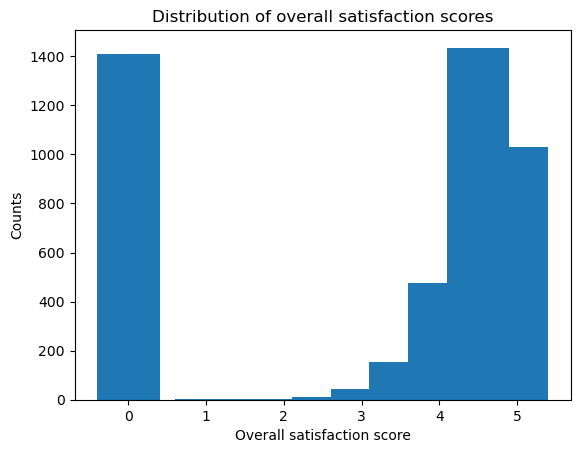

In [6]:

score_count={}

for n in airbnb_data:
    new=n['overall_satisfaction']
    
    if n['reviews']!=0:
        if new not in score_count:
            score_count[new]=1
        else:
            score_count[new]+=1
#print(score_count)

import matplotlib.pyplot as plt 
list4=sorted(score_count.items())
x,y=zip(*list4)

plt.bar(x,y)
plt.title('Distribution of overall satisfaction scores')
plt.xlabel('Overall satisfaction score')
plt.ylabel('Counts')
plt.show()

* Plot a geographical representation of all of the listings in Singapore

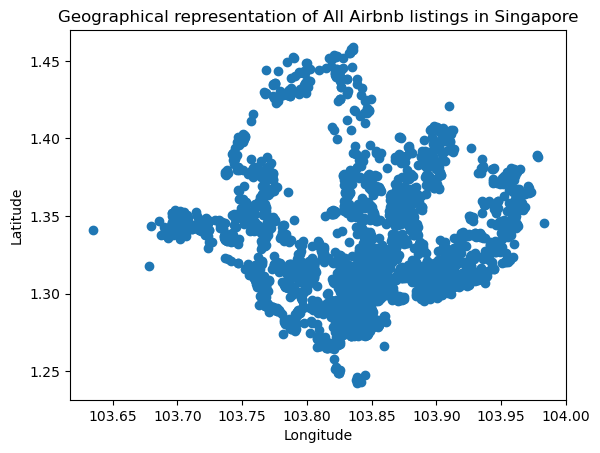

In [7]:
locations_data={}

for n in airbnb_data:
    x=n['longitude']
    y=n['latitude']
    lid=n['listing_id']
    
    if lid not in locations_data:
        locations_data[x]=y
#print(locations_data)

import matplotlib.pyplot as plt
list5=locations_data.items()
a,b=zip(*list5)
plt.scatter(a,b)
plt.title('Geographical representation of All Airbnb listings in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# AirBnB Visualisation and Price Recommender App
<b> Develop an <b><i>app</i></b> which will serve the 2 main users:
1. Guests
    - Visualisation tool to recommend them the best listings based on price and overall satisfaction score in a neighborhood
2. Hosts
    - Recommend a price to set for their listing in a given neighborhood based on better performing listings

<hr>
    
### `get_all_latitudes()` - Functions to get all latitudes given a list of listing_ids  

In [8]:
data=airbnb_data
#data[:1]

def get_all_latitude(data,list1):
    latitudes_id=[]
    for n in data:
        for i in list1:
            if i==n['listing_id']:
                latitudes_id.append(n['latitude'])
    return latitudes_id
get_all_latitude(airbnb_data, ['10350448','13507262','13642646'])

[1.305702, 1.296138, 1.304393]

### `get_all_longitudes()` - Functions to get all longitudes given a list of listing_ids 

In [9]:
def get_all_longitude(data,list2):
    longitudes_id=[]
    for n in data:
        for i in list2:
            if i==n['listing_id']:
                longitudes_id.append(n['longitude'])
    return longitudes_id
get_all_longitude(airbnb_data, ['10350448','13507262','13642646'])

[103.79878, 103.767841, 103.784174]

### `listings_recommender()` - Function to recommend all listings based on a given price, satisfaction score and neighborhood 

In [10]:
def listings_recommender(data, price, score, nid):
    results1=[]
    
    for n in data:
        if n['price']<=price:
            if n['overall_satisfaction']>=score:
                if n['neighborhood']==nid:
                    results1.append(n['listing_id'])
    return results1
listings_recommender(airbnb_data, 60, 5, 'MK03')

['10350448',
 '13507262',
 '13642646',
 '15099645',
 '6451493',
 '4696031',
 '2898794',
 '13181050',
 '9022211',
 '5200263',
 '6529707',
 '14433262']

### `price_recommender()` - Function to recommend a price in a neighborhood based on average price and overall satisfaction 

In [11]:
def price_recommender(data,nid2):
    nid_price_count={}
    
    for n in data:
        if n['reviews']>=1 and n['overall_satisfaction']>=4:
            if nid2==n['neighborhood']:
                if nid2 not in nid_price_count:
                    nid_price_count[nid2]=[n['price'],1]
                else:
                    nid_price_count[nid2][0]+=n['price']
                    nid_price_count[nid2][1]+=1
                    
    return round(nid_price_count[nid2][0]/nid_price_count[nid2][1],2)

price_recommender(airbnb_data, 'TS17')


66.28

### `visualise_listings()` - Function to geographically visualise a given list of listings 

In [13]:
import mplleaflet
import matplotlib.pyplot as plt

def visualise_listings(data, list3):
    longitude_list=[]
    latitude_list=[]
    
    longitude_list.append(get_all_longitude(data,list3))
    latitude_list.append(get_all_latitude(data,list3))
    
    plt.scatter(longitude_list,latitude_list, marker='*', s=1000,color ='red')
    mplleaflet.show()
    
# visualise_listings(airbnb_data, ['10350448','13507262','13642646'])

<img src="https://i.imgur.com/HwQYouJ.jpg" width="400">

In [14]:
neighborhood_to_test = 'TS23'

#Write code below
price_recommender(airbnb_data,neighborhood_to_test)

98.52

In [15]:
neighborhood_to_test = 'TS17'
price_to_test = 100
overall_satisfaction_to_test = 4


# visualise_listings(airbnb_data,listings_recommender(airbnb_data,price_to_test,overall_satisfaction_to_test,neighborhood_to_test))

<img src="https://i.imgur.com/MnyhDmL.jpg" width=400>